In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.tree import export_text

In [2]:
df = pd.read_csv('/content/spam.csv')
spam=df.dropna(axis=1)

In [3]:
spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
11297,ham,re research and development charges to gp...
11298,ham,"re receipts from visit jim , thanks aga..."
11299,ham,re enron case study update wow ! all on ...
11300,ham,"re interest david , please , call shirl..."


In [4]:
spam.shape

(11302, 2)

In [5]:
spam.describe()


,Category,Message
count,11302,11302
unique,2,10854
top,ham,"Sorry, I'll call later"
freq,9187,30


In [6]:
spam.groupby(spam['Category']).size()


Category
ham     9187
spam    2115
dtype: int64

In [7]:
spam.Category = spam.Category.apply(lambda x: 1 if x == 'spam' else 0)


<ipython-input-7-29cc23c071f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam.Category = spam.Category.apply(lambda x: 1 if x == 'spam' else 0)


In [8]:
spam



,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
11297,0,re research and development charges to gp...
11298,0,"re receipts from visit jim , thanks aga..."
11299,0,re enron case study update wow ! all on ...
11300,0,"re interest david , please , call shirl..."


In [9]:
messages = spam.iloc[:,1] # Messages column


In [10]:
messages.head()


0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [11]:
ifSpam = spam.iloc[:,0] # Spam column

In [12]:
ifSpam


0        0
1        0
2        1
3        0
4        0
        ..
11297    0
11298    0
11299    0
11300    0
11301    0
Name: Category, Length: 11302, dtype: int64

In [13]:
messages_train, messages_test, ifSpam_train, ifSpam_test = train_test_split(messages, ifSpam, test_size=0.25)


In [14]:
cv = CountVectorizer(stop_words='english')

In [15]:
features = cv.fit_transform(messages_train)

In [16]:
features_test = cv.transform(messages_test)

In [17]:
knModel = KNeighborsClassifier(n_neighbors=1)
knModel.fit(features, ifSpam_train)
knPredict = knModel.predict(features_test)
svModel = svm.SVC(probability=True)
svModel.fit(features,ifSpam_train)
svPredict = svModel.predict(features_test)
dtModel = tree.DecisionTreeClassifier()
dtModel.fit(features, ifSpam_train)
dtPredict = dtModel.predict(features_test)


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve

def show_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

def show_precision_recall(model, x_test, y_test):
    display = PrecisionRecallDisplay.from_estimator(model, x_test, y_test)
    plt.show()

def show_roc_curve(model, x_test, y_test):
    model_prob = model.predict_proba(x_test)
    fpr1, tpr1, thresh1 = roc_curve(y_test, model_prob[:,1], pos_label=1)

    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

    plt.plot(fpr1, tpr1, linestyle= "--", color= "blue")
    plt.plot(p_fpr, p_tpr, linestyle= "--", color= "green")
    plt.show()

# **KNN Classifier**

In [19]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0],
                                                                      (ifSpam_test != knPredict).sum()))

Number of mislabeled out of a total of 2826 test entries: 227


In [20]:
successRate = 100.0 * f1_score(ifSpam_test, knPredict, average='micro')
print(f1_score(ifSpam_test, knPredict, average='micro'))

0.9196744515215853


In [21]:
print("The Success Rate was calculated as % : " + str(successRate) + " with the K-Nearest-Neighbors")

The Success Rate was calculated as % : 91.96744515215853 with the K-Nearest-Neighbors


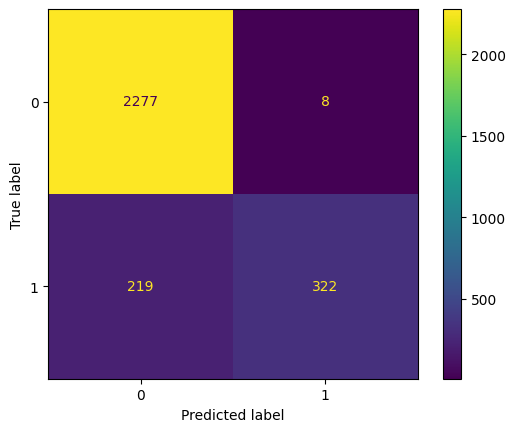

In [22]:
show_confusion_matrix(ifSpam_test, knPredict)

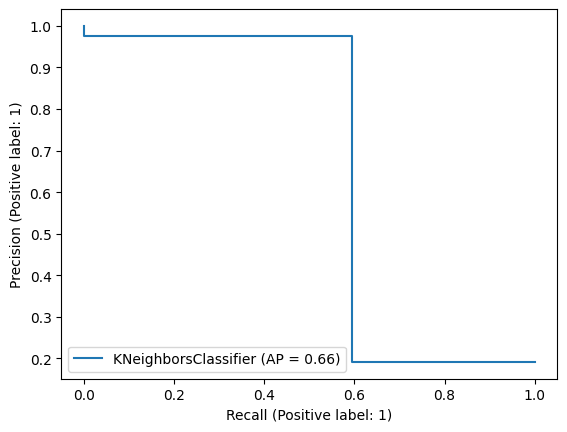

In [23]:
show_precision_recall(knModel, features_test, ifSpam_test)


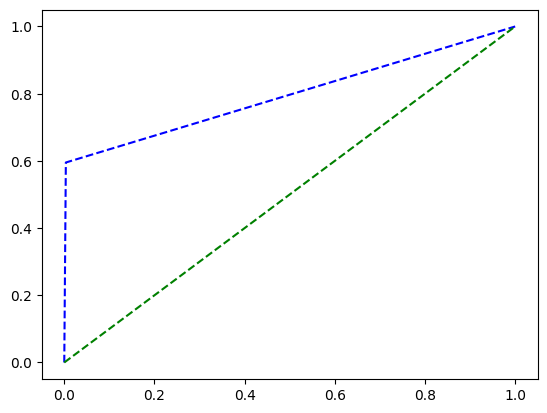

In [24]:
show_roc_curve(knModel, features_test, ifSpam_test)

# **SVC Model**

In [25]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0],
                                                                      (ifSpam_test != svPredict).sum()))

Number of mislabeled out of a total of 2826 test entries: 153


In [26]:
successRate = 100.0 * f1_score(ifSpam_test, svPredict, average='micro')


In [27]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Support Vector Machine")


The Success Rate was calculated as % : 94.5859872611465 with Support Vector Machine


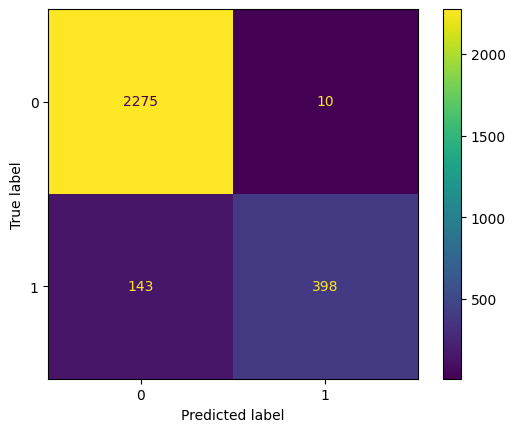

In [28]:
show_confusion_matrix(ifSpam_test, svPredict)

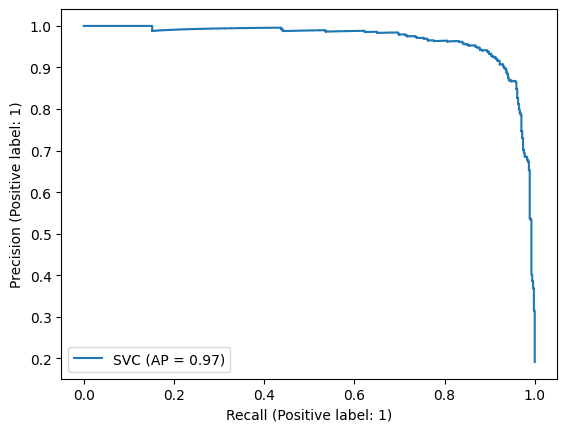

In [29]:
show_precision_recall(svModel, features_test, ifSpam_test)

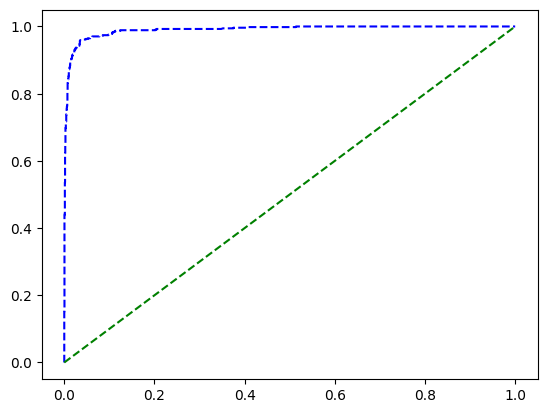

In [30]:
show_roc_curve(svModel, features_test, ifSpam_test)

In [31]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
kn_Values = precision_score(ifSpam_test, knPredict, average='macro')
sv_values = precision_score(ifSpam_test, svPredict, average='macro')
td_values = precision_score(ifSpam_test, dtPredict, average='macro')


kn_rec = recall_score(ifSpam_test, knPredict, average='macro')
sv_rec = recall_score(ifSpam_test, svPredict, average='macro')
td_rec = recall_score(ifSpam_test, dtPredict, average='macro')

kn_f = f1_score(ifSpam_test, knPredict, average='macro')
sv_f = f1_score(ifSpam_test, svPredict, average='macro')
td_f = f1_score(ifSpam_test, dtPredict, average='macro')

kn_acc = accuracy_score(ifSpam_test, knPredict)
sv_acc = accuracy_score(ifSpam_test, svPredict)
td_acc = accuracy_score(ifSpam_test, dtPredict)


In [34]:
print(kn_Values, sv_values, td_values)
print(kn_rec, sv_rec, td_rec)
print(kn_f,sv_f,td_f)
print(kn_acc,sv_acc,td_acc)

0.9440085955710955 0.9581752055660975 0.9348371631674657
0.7958464954679114 0.8656491544550371 0.9255560454139146
0.8459502080926438 0.903122617292238 0.9301037673273449
0.9196744515215853 0.945859872611465 0.9571832979476291


# **Decision Tree**

In [35]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0],
                                                                      (ifSpam_test != dtPredict).sum()))

Number of mislabeled out of a total of 2826 test entries: 121


In [36]:
successRate = 100.0 * f1_score(ifSpam_test, dtPredict, average='micro')
print("The Success Rate was calculated as % : " + str(successRate) + " with Decision Tree")

The Success Rate was calculated as % : 95.71832979476291 with Decision Tree


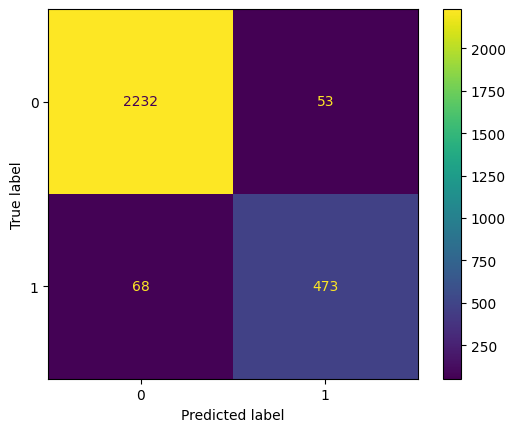

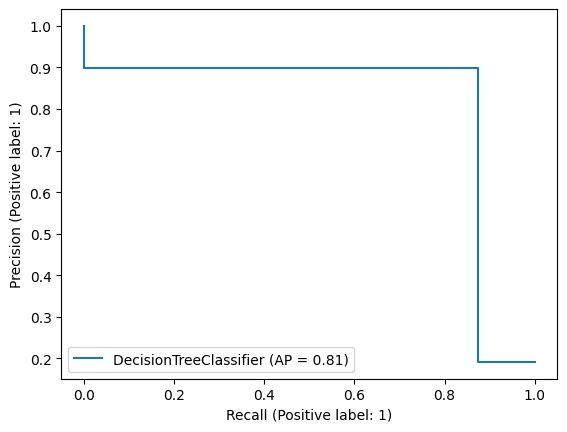

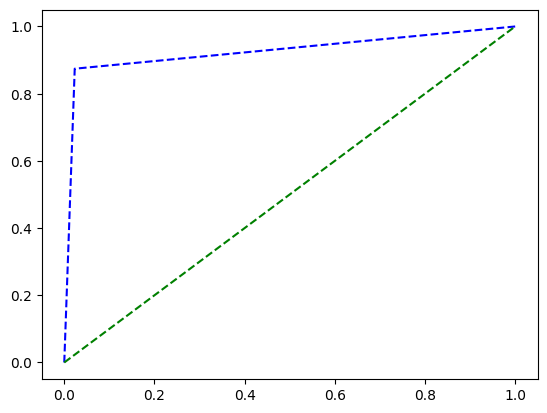

In [37]:
show_confusion_matrix(ifSpam_test, dtPredict)
show_precision_recall(dtModel, features_test, ifSpam_test)
show_roc_curve(dtModel, features_test, ifSpam_test)

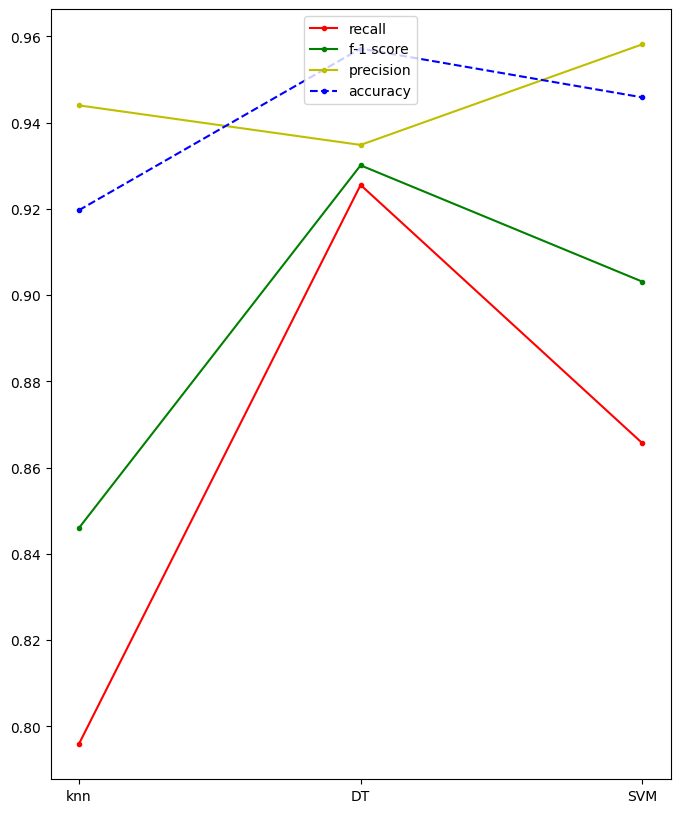

In [38]:
import numpy as np
import matplotlib.pyplot as plt

precision=[kn_Values,td_values,sv_values]
recall=[kn_rec,td_rec,sv_rec]
f1=[kn_f,td_f,sv_f]
accuracy=[kn_acc,td_acc,sv_acc]
xcor=['knn','DT','SVM']
fig = plt.figure(figsize = (8, 10))

plt.plot(xcor, recall,'r.-',label='recall')
plt.plot(xcor,f1,'g.-',label='f-1 score')
plt.plot(xcor,precision,'y.-',label='precision')
plt.plot(xcor,accuracy,'b.--',label='accuracy')


plt.legend(loc=9)
plt.show()